1. Implement K-Means clustering on the Iris dataset.
2. Visualize clusters and compare them with true labels using a confusion matrix.
3. Compare K-Means and Hierarchical Clustering results for the same dataset. 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [22]:
iris=load_iris()
x=iris.data
y=iris.target

In [23]:
kmeans=KMeans(n_clusters=3,random_state=42)
y_kmeans=kmeans.fit_predict(x)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
df=pd.DataFrame(x,columns=iris.feature_names)
df['Actual']=y
df['Cluster']=y_kmeans

print("Cluster Centers:\n",kmeans.cluster_centers_)
print("\nSample Clustered data:\n",df.head())
cm=confusion_matrix(y,y_kmeans)
print("\nConfusion Matrix:\n",cm)

Cluster Centers:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]

Sample Clustered data:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Actual  Cluster  
0       0        1  
1       0        1  
2       0        1  
3       0        1  
4       0        1  

Confusion Matrix:
 [[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]



K-Means Confusion Matrix:
 [[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


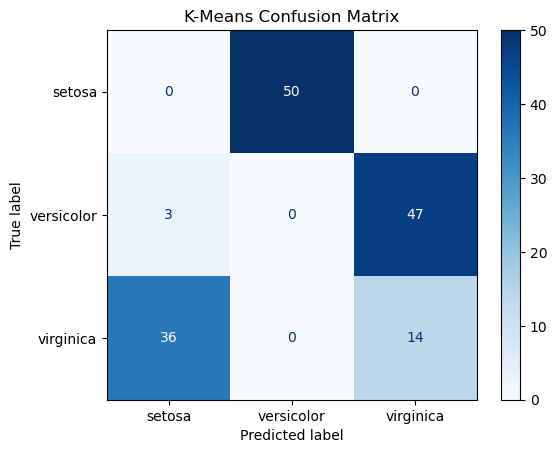

In [25]:
# Cell 5: K-Means confusion matrix
cm_kmeans = confusion_matrix(y, y_kmeans)
print("\nK-Means Confusion Matrix:\n", cm_kmeans)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('K-Means Confusion Matrix')
plt.show()

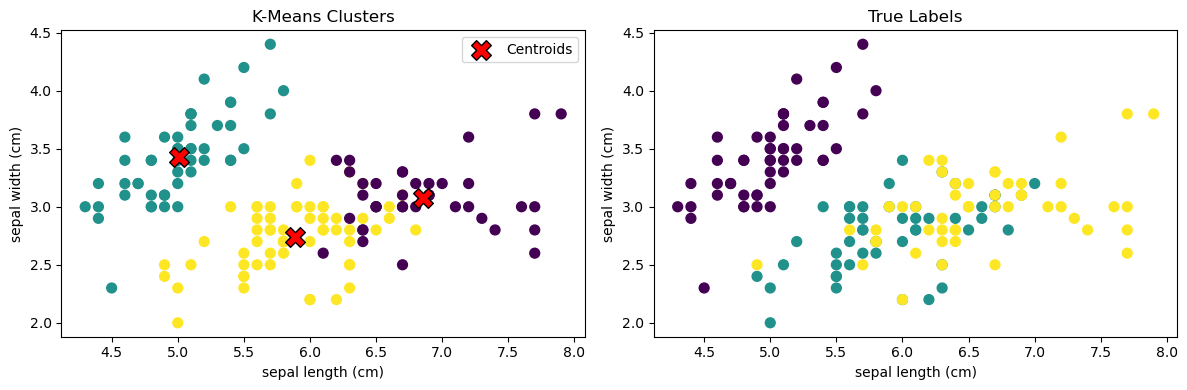

In [26]:
# Cell 6: Visualize K-Means clusters
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, edgecolors='black', label='Centroids')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-Means Clusters')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', s=50)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('True Labels')
plt.tight_layout()
plt.show()

In [27]:
# Cell 7: Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hierarchical = hierarchical.fit_predict(x)

df['Hierarchical_Cluster'] = y_hierarchical
print("\nSample data with both clusterings:\n", df.head())



Sample data with both clusterings:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Actual  Cluster  Hierarchical_Cluster  
0       0        1                     1  
1       0        1                     1  
2       0        1                     1  
3       0        1                     1  
4       0        1                     1  



Hierarchical Confusion Matrix:
 [[ 0 50  0]
 [49  0  1]
 [15  0 35]]


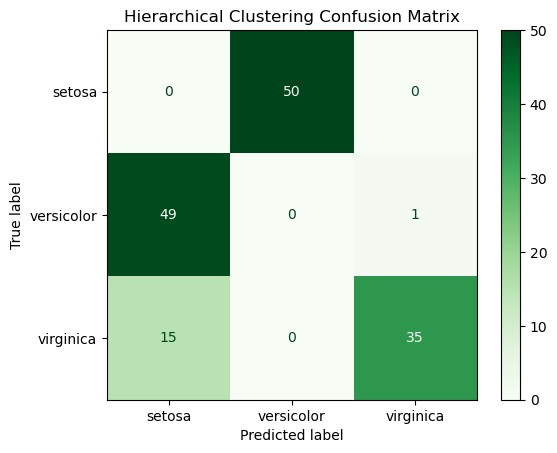

In [28]:
# Cell 8: Hierarchical confusion matrix
cm_hierarchical = confusion_matrix(y, y_hierarchical)
print("\nHierarchical Confusion Matrix:\n", cm_hierarchical)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_hierarchical, display_labels=iris.target_names)
disp.plot(cmap='Greens')
plt.title('Hierarchical Clustering Confusion Matrix')
plt.show()

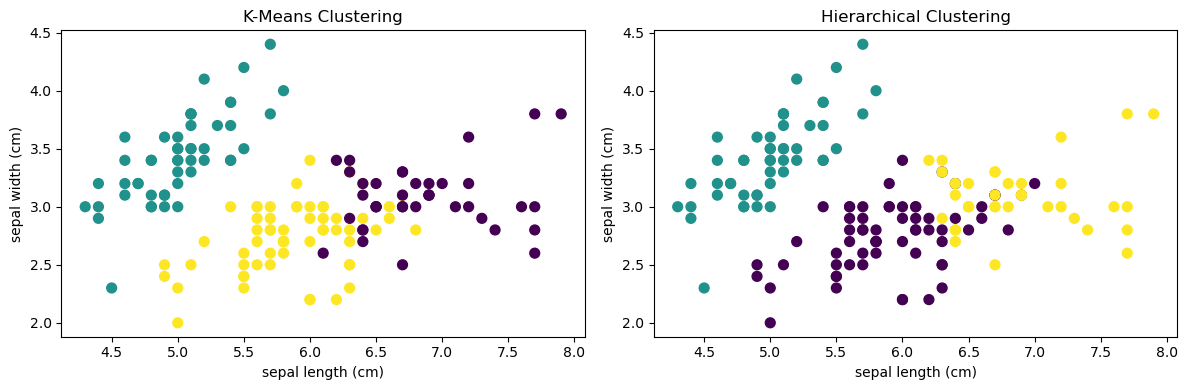

In [29]:
# Cell 9: Compare both methods
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-Means Clustering')

plt.subplot(1, 2, 2)
plt.scatter(x[:, 0], x[:, 1], c=y_hierarchical, cmap='viridis', s=50)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Hierarchical Clustering')
plt.tight_layout()
plt.show()


In [30]:
# Cell 10: Comparison summary
print("\n=== Clustering Comparison ===")
print(f"K-Means cluster distribution: {pd.Series(y_kmeans).value_counts().sort_index().values}")
print(f"Hierarchical cluster distribution: {pd.Series(y_hierarchical).value_counts().sort_index().values}")
print(f"True label distribution: {pd.Series(y).value_counts().sort_index().values}")
print(f"\nAgreement between methods: {(y_kmeans == y_hierarchical).sum()}/{len(y)} samples")


=== Clustering Comparison ===
K-Means cluster distribution: [39 50 61]
Hierarchical cluster distribution: [64 50 36]
True label distribution: [50 50 50]

Agreement between methods: 53/150 samples
